In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [15]:
ticker = 'MSFT'
start_date = '2018-01-01'
end_date = '2023-12-20'

In [16]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,86.129997,86.309998,85.500000,85.949997,80.229004,22483800
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,80.602379,26061400
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,81.311813,21912000
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,82.319923,23407100
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,82.403931,22113000
...,...,...,...,...,...,...,...
1497,2023-12-13,376.019989,377.640015,370.769989,374.369995,374.369995,30955500
1498,2023-12-14,373.309998,373.760010,364.130005,365.929993,365.929993,43277500
1499,2023-12-15,366.850006,372.399994,366.279999,370.730011,370.730011,78478200
1500,2023-12-18,369.450012,373.000000,368.679993,372.649994,372.649994,21802900


In [17]:
close = df['Close']

In [18]:
print(close.values)

[ 85.94999695  86.34999847  87.11000061 ... 370.73001099 372.6499939
 373.26000977]


In [19]:
scaler = MinMaxScaler()
data = scaler.fit_transform(close.values.reshape(-1, 1))
data

array([[0.00315763],
       [0.00450131],
       [0.00705431],
       ...,
       [0.95979038],
       [0.96623999],
       [0.96828915]])

In [20]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
train_data.shape, test_data.shape

((1201, 1), (301, 1))

In [21]:
test_data[20]

array([0.47989515])

In [22]:
past_values = 20
def data_preparation(data,past_values):
    X = []
    y = []
    for i in range(past_values, len(data)):
        X.append(data[i-20:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [23]:
X_train, y_train = data_preparation(train_data,past_values)
X_test, y_test = data_preparation(test_data,past_values)

In [24]:
X_train, y_train

(array([[[0.00315763],
         [0.00450131],
         [0.00705431],
         ...,
         [0.03040074],
         [0.02993045],
         [0.02596659]],
 
        [[0.00450131],
         [0.00705431],
         [0.01068225],
         ...,
         [0.02993045],
         [0.02596659],
         [0.03359199]],
 
        [[0.00705431],
         [0.01068225],
         [0.01098457],
         ...,
         [0.02596659],
         [0.03359199],
         [0.03107259]],
 
        ...,
 
        [[0.58141015],
         [0.58285458],
         [0.60280823],
         ...,
         [0.49679192],
         [0.52312808],
         [0.55047196]],
 
        [[0.58285458],
         [0.60280823],
         [0.61016489],
         ...,
         [0.52312808],
         [0.55047196],
         [0.55154688]],
 
        [[0.60280823],
         [0.61016489],
         [0.56091907],
         ...,
         [0.55047196],
         [0.55154688],
         [0.54345119]]]),
 array([[0.03359199],
        [0.03107259],
        [0.

In [25]:
X_train.shape, y_train.shape

((1181, 20, 1), (1181, 1))

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0
# )
# model.fit(X_train, y_train, batch_size=200, epochs=500, verbose=1, callbacks=[callback])

Epoch 1/200
6/6 [==============================] - 10s 96ms/step - loss: 0.0616
Epoch 2/200
6/6 [==============================] - 1s 99ms/step - loss: 0.0179
Epoch 3/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0121
Epoch 4/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0041
Epoch 5/200
6/6 [==============================] - 0s 81ms/step - loss: 0.0029
Epoch 6/200
6/6 [==============================] - 1s 83ms/step - loss: 0.0021
Epoch 7/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0013
Epoch 8/200
6/6 [==============================] - 1s 86ms/step - loss: 0.0012
Epoch 9/200
6/6 [==============================] - 1s 99ms/step - loss: 0.0010
Epoch 10/200
6/6 [==============================] - 1s 86ms/step - loss: 9.4854e-04
Epoch 11/200
6/6 [==============================] - 1s 109ms/step - loss: 9.2750e-04
Epoch 12/200
6/6 [==============================] - 1s 88ms/step - loss: 9.0115e-04
Epoch 13/200
6/6 [=================

6/6 [==============================] - 1s 89ms/step - loss: 5.7304e-04
Epoch 99/200
6/6 [==============================] - 1s 82ms/step - loss: 5.6760e-04
Epoch 100/200
6/6 [==============================] - 1s 86ms/step - loss: 5.6183e-04
Epoch 101/200
6/6 [==============================] - 0s 77ms/step - loss: 5.4620e-04
Epoch 102/200
6/6 [==============================] - 0s 79ms/step - loss: 5.5601e-04
Epoch 103/200
6/6 [==============================] - 1s 83ms/step - loss: 5.5014e-04
Epoch 104/200
6/6 [==============================] - 1s 108ms/step - loss: 6.2340e-04
Epoch 105/200
6/6 [==============================] - 1s 94ms/step - loss: 6.1190e-04
Epoch 106/200
6/6 [==============================] - 1s 102ms/step - loss: 5.4691e-04
Epoch 107/200
6/6 [==============================] - 1s 108ms/step - loss: 5.4142e-04
Epoch 108/200
6/6 [==============================] - 1s 81ms/step - loss: 5.2913e-04
Epoch 109/200
6/6 [==============================] - 1s 95ms/step - loss: 5.3

6/6 [==============================] - 1s 85ms/step - loss: 3.9405e-04
Epoch 195/200
6/6 [==============================] - 1s 83ms/step - loss: 3.9436e-04
Epoch 196/200
6/6 [==============================] - 1s 89ms/step - loss: 3.8224e-04
Epoch 197/200
6/6 [==============================] - 1s 88ms/step - loss: 3.7588e-04
Epoch 198/200
6/6 [==============================] - 1s 82ms/step - loss: 3.9854e-04
Epoch 199/200
6/6 [==============================] - 1s 91ms/step - loss: 3.6911e-04
Epoch 200/200
6/6 [==============================] - 0s 78ms/step - loss: 3.6562e-04


In [28]:
pred_train = model.predict(X_train)

37/37 [==============================] - 1s 14ms/step


In [29]:
pred_train

array([[0.02517378],
       [0.02677673],
       [0.02827259],
       ...,
       [0.5185949 ],
       [0.5260809 ],
       [0.53404295]], dtype=float32)

In [30]:
mae = mean_absolute_error(y_train, pred_train)
print('mean absolute error-', mae)
mse = mean_squared_error(y_train, pred_train)
print('mean squared error-', mse)

mean absolute error- 0.013249696859155332
mean squared error- 0.000355164925852707


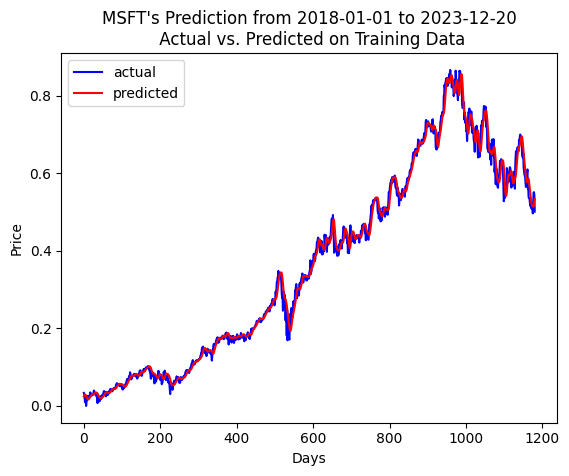

In [31]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_train, color='blue', label='actual')
plt.plot(pred_train, color='red', label='predicted')
plt.legend()

In [32]:
pred_test = model.predict(X_test)

9/9 [==============================] - 0s 20ms/step


In [33]:
mae = mean_absolute_error(y_test, pred_test)
print('mean absolute error-', mae)
mse = mean_squared_error(y_test, pred_test)
print('mean squared error-', mse)

mean absolute error- 0.01894041102646008
mean squared error- 0.0005830563540622858


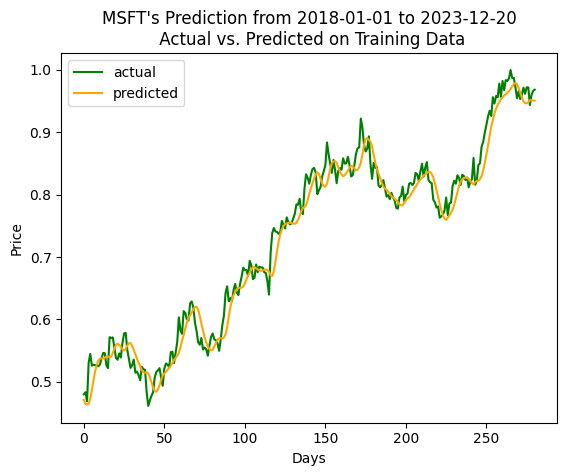

In [34]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_test, color='green', label='actual')
plt.plot(pred_test, color='orange', label='predicted')
plt.legend()

In [50]:
ticker = 'MSFT'
start_date = '2023-12-20'
end_date = '2023-12-30'
df_future = yf.download(ticker, start_date, end_date).reset_index()['Close']
df_future

[*********************100%***********************]  1 of 1 completed


0    370.619995
1    373.540009
2    374.579987
3    374.660004
4    374.070007
5    375.279999
6    376.040009
Name: Close, dtype: float64

In [51]:
df_future = df_future.values

In [52]:
future_data_to_predict = np.array(close[-20:])
future_data_to_predict

array([373.07000732, 377.8500061 , 377.42999268, 378.60998535,
       382.70001221, 378.8500061 , 378.91000366, 374.51000977,
       369.14001465, 372.51998901, 368.79998779, 370.95001221,
       374.23001099, 371.29998779, 374.38000488, 374.36999512,
       365.92999268, 370.73001099, 372.6499939 , 373.26000977])

In [53]:
last_val = future_data_to_predict[-1]
last_val

373.260009765625

---------------------------------------------------------------------------------------------------------------------------

In [54]:
def prediction(future_data, last_val, days):
    
    output_data = []
    new_arr = []

    for i in range(days):
        
        if future_data[-1] == last_val:
            print('no')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 20, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)
        else:
            print('yes')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 20, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)

    return output_data
    

In [55]:
result = prediction(future_data_to_predict[-20:], last_val, len(df_future))
result

no
before [373.07000732 377.8500061  377.42999268 378.60998535 382.70001221
 378.8500061  378.91000366 374.51000977 369.14001465 372.51998901
 368.79998779 370.95001221 374.23001099 371.29998779 374.38000488
 374.36999512 365.92999268 370.73001099 372.6499939  373.26000977]
1/1 [==============================] - 0s 51ms/step
output 368.3377
after [377.8500061  377.42999268 378.60998535 382.70001221 378.8500061
 378.91000366 374.51000977 369.14001465 372.51998901 368.79998779
 370.95001221 374.23001099 371.29998779 374.38000488 374.36999512
 365.92999268 370.73001099 372.6499939  373.26000977 368.33770752]
yes
before [377.8500061  377.42999268 378.60998535 382.70001221 378.8500061
 378.91000366 374.51000977 369.14001465 372.51998901 368.79998779
 370.95001221 374.23001099 371.29998779 374.38000488 374.36999512
 365.92999268 370.73001099 372.6499939  373.26000977 368.33770752]
1/1 [==============================] - 0s 51ms/step
output 368.23953
after [377.42999268 378.60998535 382.700012

[368.3377, 368.23953, 367.6802, 366.84534, 365.83316, 364.69046, 363.5395]

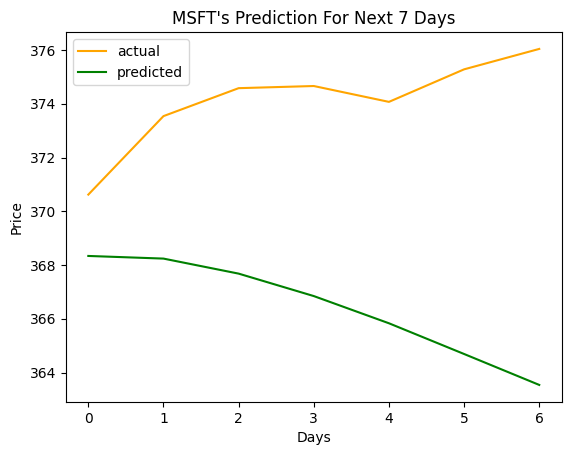

In [56]:
plt.title(f"{ticker}'s Prediction For Next {len(df_future)} Days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df_future, color='orange', label='actual')
plt.plot(result, color='green', label='predicted')
plt.legend()

In [138]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    print("*******************",np.where(controls))
    
#     inds = np.where(controls)[0]
#     print(inds)
#     buy_inds = np.where(controls>0)[0]
#     sell_inds = np.where(controls<0)[0]
#     max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
#     for i in range(buy_inds[0]+2):
#         inv.append(curr_val)
#     for i in range(buy_inds[0],max_limit+1):
#         if controls[i]>0:
#             buy_val = val[i+1]
#         elif controls[i]<0:
#             sell_val = val[i+1]
#             curr_val = curr_val*sell_val/buy_val
#         inv.append(curr_val)
        
#     if max_limit+1!=len(controls):
#         for i in range(len(controls)-max_limit-1):
#             inv.append(curr_val)
#     return inv

In [139]:
# controls_actual = get_control_vector(df_future)
# amount_actual = buy_and_sell_bot(future_data, controls_actual)
# controls_actual,amount_actual

In [156]:
controls_pred= get_control_vector(np.array(result))
# amount_pred = buy_and_sell_bot(result, controls_pred)
# amount_pred,
np.sign(np.diff(np.array(result))), np.sign(np.diff(df_future))

(array([1., 1., 1., 1., 1., 1.], dtype=float32),
 array([ 1., -1., -1., -1.,  1., -1.]))

In [154]:
df_future

array([152.11999512, 153.83999634, 153.41999817, 153.41000366,
       153.33999634, 153.38000488, 151.94000244])

In [155]:
result = np.array(result)
result

array([153.55403, 154.67691, 155.34634, 155.79456, 156.12683, 156.38371,
       156.59152], dtype=float32)